In [8]:
import networkx as nx



In [9]:
def z6(z, b, soma, w):
    a = -1
    #b = 2
    c = -0.9
    #w = 0.3
    beta = 0.07
    return (a * abs(z) ** 4 + b * abs(z) ** 2 + c + w*1j) * z + beta*soma

In [10]:
def eqb(b, z):
    
    a = -1
    bo = 20
    c = -0.9
    w = 0.3
    
    bth = 2 * np.sqrt(a * c)
    tau = 1000#2 * np.pi * 100 / 0.3
    #zo = -0.5 * bo * (1 + np.sqrt(1 - 4 * a * c / bo ** 2)) / a
    zo = -0.5 * bth / a
    
    return (bo * (1 - abs(z) / zo) - b) / tau
    #return 0

In [11]:
def rk_z6(g,dt,ac):
    
    w = [0, .5, .5, 1]
    w2 = [0,1,2,2,1]
    
    #db/dt = (b* (1 - rho / rho *) - b )/tau
    
    for i in range(4): 
        for (node) in nx.nodes(g):
            z_no = g.node[node]['z'][0] + w[i] * g.node[node]['z'][i]
            b_no = g.node[node]['b'][0] + w[i] * g.node[node]['b'][i]
            soma = 0
            for (u) in nx.all_neighbors(g, node):
                soma += g.node[u]['z'][0] + w[i] * g.node[u]['z'][i]
            
            #g.node[node]['z'][i+1] = dt * z6(z_no, g.node[node]['b'][0], ac[node][u] * soma, g.node[node]['w'])
            #g.node[node]['z'][i+1] = dt * z6(z_no, g.node[node]['b'][0], ac * soma, g.node[node]['w'])
            g.node[node]['z'][i+1] = dt * z6(z_no, g.node[node]['b'][0], soma, g.node[node]['w'])
            g.node[node]['b'][i+1] = dt * eqb(b_no, g.node[node]['z'][0])
            

    for (node) in nx.nodes(g):
        zt = g.node[node]['z']
        bt = g.node[node]['b']
        for i in range(1,5):
            zt[i] = w2[i] * zt[i] / 6
            bt[i] = w2[i] * bt[i] / 6
            
        #
        # Descomentar a linha abaixo para incluir o ruído
        #
        g.node[node]['z'][0] = sum(zt) + np.sqrt(dt) * (random.gauss(0,.1) + random.gauss(0,.1)*1j)
        g.node[node]['b'][0] = sum(bt)
    
    return g
    

In [12]:
import random
import numpy as np

n = 19
#g = nx.complete_graph(n)
g = nx.Graph()
g.add_node(0)
g.add_node(1)
while not nx.is_connected(g):
    g = nx.erdos_renyi_graph(n,0.5)


x = []
y = []
b = []
z = []
for node in nx.nodes(g):
    #fase = random.uniform(0,2*np.pi)
    #g.node[node]['z'] = [1.5* np.cos(fase) + 1.5 *np.sin(fase) * 1j, 0, 0, 0, 0]
    g.node[node]['z'] = [0 + 0*1j, 0, 0, 0, 0]
    g.node[node]['b'] = [2, 0, 0, 0, 0]
    g.node[node]['w'] = random.uniform(-0.2, .2)
    x += [[g.node[node]['z'][0].real]]
    y += [[g.node[node]['z'][0].imag]]
    b += [[g.node[node]['b'][0]]]
    z += [[abs(g.node[node]['z'][0])]]
    
dt = 0.1

# ac = [[0, 1, -1, 1], 
#       [1, 0, 1, -1],
#       [-1, 1, 0, -1],
#       [1, -1, -1, 0]]https://github.com/Epilep/z6
# ac = n * [n * [1j]]
ac = 1

for i in range(int(10000/dt)):
    g = rk_z6(g, dt, ac)
    for node in nx.nodes(g):
        x[node] += [g.node[node]['z'][0].real]
        y[node] += [g.node[node]['z'][0].imag]
        b[node] += [g.node[node]['b'][0]]
        z[node] += [abs(g.node[node]['z'][0])]
    
#         y[node] += [g.node[node]['zn'].imag]
#     for (node) in nx.nodes(g):
#         z_no = g.node[node]['z']
#         soma = 0
#         for (u) in nx.all_neighbors(g, node):
#             soma += g.node[u]['z']
#         g.node[node]['zn'] = rk_z6(z_no, soma, dt)
#         x[node] += [g.node[node]['zn'].real]
#         y[node] += [g.node[node]['zn'].imag]
        
#     for (node) in nx.nodes(g):
#         g.node[node]['z'] = g.node[node]['zn']

<IPython.core.display.Javascript object>


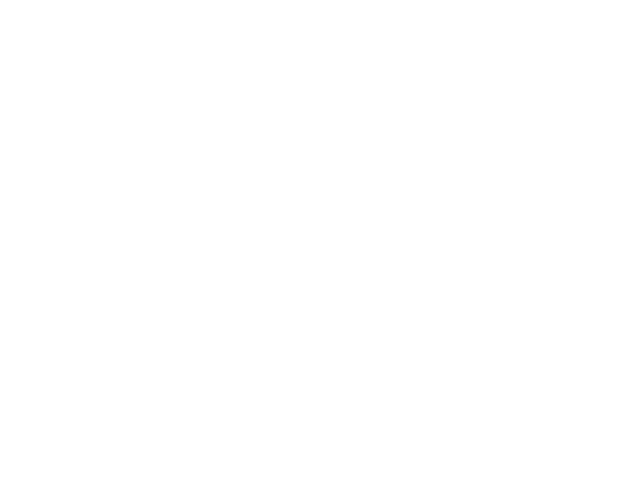

In [13]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

%matplotlib notebook

fig, ax = plt.subplots()
points = []

#points, = ax.plot(n*[],n*[], 'bo')

for i in range(n):
    point, = ax.plot([],[], 'bo')
    points += [ point ]

# point0, = ax.plot([],[], 'bo')
# point1, = ax.plot([],[], 'ro')
# point2, = ax.plot([],[], 'go')
# point3, = ax.plot([],[], 'mo')

plt.xlim(-3,3)
plt.ylim(-3,3)

def init():
    for i in range(n):
        points[i].set_data([], [])
#     point0.set_data([], [])
#     point1.set_data([], [])
#     point2.set_data([], [])
#     point3.set_data([], [])
    #return points,

def animate(t):
    t = t * 1000
    for i in range(n):
        points[i].set_data([x[i][t]], [y[i][t]])
#     point0.set_data([x[0][i]], [y[0][i]])
#     point1.set_data([x[1][i]], [y[1][i]])
#     point2.set_data([x[2][i]], [y[2][i]])
#     point3.set_data([x[3][i]], [y[3][i]])
    
    
anim = animation.FuncAnimation(fig, animate, frames=int(len(x[0]) / 1000), init_func=init, interval=1, blit=True)
#anim = animation.FuncAnimation(fig, animate, frames=10, init_func=init, interval=1, blit=True)


# ani = animation.FuncAnimation(fig, update, generate_points, interval=300)
#ani.save('animation.gif', writer='imagemagick', fps=24);

# mywriter = animation.FFMpegWriter()
anim.save('animation.mp4', fps=20, writer="ffmpeg", codec="libx264")

plt.show()


# plt.plot(x[0],y[0])
# plt.plot(x[1],y[1],'r-.')
# plt.plot(x[2],y[2],'g:',)
# plt.show()

Traceback (most recent call last):
  File "/usr/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "/usr/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "/usr/lib/python3.6/site-packages/matplotlib/animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<Figure size 432x288 with 0 Axes>

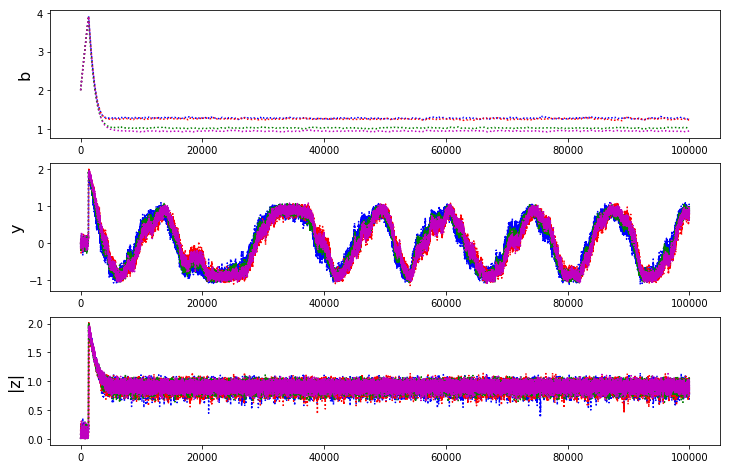

In [14]:
%matplotlib inline

plt.clf()
plt.figure(figsize=(12,8))
plt.subplot(3,1,1)
plt.plot(b[0],'b:')
plt.plot(b[1],'r:')
plt.plot(b[2],'g:')
plt.plot(b[3],'m:')
plt.ylabel('b', fontsize=16)

plt.subplot(3,1,2)
plt.plot(y[0],'b:')
plt.plot(y[1],'r:')
plt.plot(y[2],'g:')
plt.plot(y[3],'m:')
plt.ylabel('y', fontsize=16)

plt.subplot(3,1,3)
plt.plot(z[0],'b:')
plt.plot(z[1],'r:')
plt.plot(z[2],'g:')
plt.plot(z[3],'m:')
plt.ylabel('|z|', fontsize=16)

#plt.xlim(0,2000)
plt.show()